## Setup

In [1]:
source("2022_PSVD_metabolomics/2022_PSVD_metabolomics/R/00_setup.R")

In [2]:
p_load("dplyr", "ggplot2", "pathview", install = FALSE)

Warning message in p_load("dplyr", "ggplot2", "pathview", install = FALSE):
“Failed to install/load:
pathview”


In [3]:
metabol <- read.csv("outputs/01_metabolomics_merged.csv")
metabol <- metabol[2:ncol(metabol)]
metadata <- read.csv("outputs/01_metadata.csv")
metadata <- metadata[2:ncol(metadata)]

In [4]:
cir_up <- read.csv("outputs/02_cir_up")
cir_down <- read.csv("outputs/02_cir_down")

psvd_up <- read.csv("outputs/02_psvd_up")
psvd_down <- read.csv("outputs/02_psvd_down")

cir_cneg <- read.csv("outputs/02_cir_cneg")
psvd_cir <- read.csv("outputs/02_psvd_cir")
psvd_cneg <- read.csv("outputs/02_psvd_cneg")

In [ ]:
mSet<-InitDataObjects("conc", "pathora", FALSE)
cmpd.vec<- (pathways)
mSet<-Setup.MapData(mSet, cmpd.vec);
mSet<-CrossReferencing(mSet, "hmdb");
mSet<-CreateMappingResultTable(mSet)
mSet<-SetKEGG.PathLib(mSet, "hsa", "current")
mSet<-SetMetabolomeFilter(mSet, F);
mSet<-CalculateOraScore(mSet, "rbc", "hyperg")
mSet<-PlotPathSummary(mSet, F, "path_view_1_", "png", 72, width=NA, NA, NA )
mSet<-PlotPathSummary(mSet, F, "path_view_2_", "png", 72, width=NA, NA, NA )

## Pathway overlaps

In [7]:
pathways_names$V2 <- gsub("\\ -.*","",pathways_names$V2)

In [8]:
cir_cneg_sig <- cir_cneg_path %>% filter(FDR < 0.25) %>% arrange(FDR) #%>% head(15) %>% knitr::kable(caption = "Top 10 enriched pathways in CIR/CNEG") #%>% knitr::kable_styling(bootstrap_options = "striped", full_width = F)

cir_cneg_sig$source <- "CIR"

psvd_cneg_sig <- psvd_cneg_path %>% filter(FDR < 0.25) %>% arrange(FDR) #%>% head(15) %>% knitr::kable(caption = "Top 10 enriched pathways in PSVD/CNEG") #%>% knitr::kable_styling(bootstrap_options = "striped", full_width = F)

psvd_cneg_sig$source <- "PSVD"

In [9]:
left_join(cir_cneg_sig, pathways_names %>% rename(X = V1), by = "X")

X,Total,Expected,Hits,Raw.p,X.log.p.,Holm.adjust,FDR,Impact,source,V2
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
hsa00970,48,1.48650,11,7.4138e-08,16.4170,6.2276e-06,6.2276e-06,0.00000,CIR,Aminoacyl-tRNA biosynthesis
hsa00250,28,0.86710,8,9.0531e-07,13.9150,7.5140e-05,3.8023e-05,0.58254,CIR,"Alanine, aspartate and glutamate metabolism"
hsa00630,32,0.99097,6,3.1560e-04,8.0610,2.5879e-02,8.8367e-03,0.10318,CIR,Glyoxylate and dicarboxylate metabolism
hsa00471,6,0.18581,3,5.2271e-04,7.5565,4.2340e-02,1.0854e-02,0.50000,CIR,D-Glutamine and D-glutamate metabolism
hsa00220,14,0.43355,4,6.4607e-04,7.3446,5.1686e-02,1.0854e-02,0.11675,CIR,Arginine biosynthesis
hsa00020,20,0.61935,4,2.7258e-03,5.9050,2.1533e-01,3.8161e-02,0.18766,CIR,Citrate cycle (TCA cycle)
hsa00400,4,0.12387,2,5.4168e-03,5.2182,4.2251e-01,6.5002e-02,0.50000,CIR,"Phenylalanine, tyrosine and tryptophan biosynthesis"
hsa00650,15,0.46452,3,9.7644e-03,4.6290,7.5186e-01,1.0253e-01,0.00000,CIR,Butanoate metabolism
hsa00340,16,0.49548,3,1.1759e-02,4.4432,8.9366e-01,1.0931e-01,0.22131,CIR,Histidine metabolism


In [11]:
combined_pathways <- rbind(cir_cneg_sig, psvd_cneg_sig)

duplicate_pathways <- combined_pathways %>% janitor::get_dupes(X)

combined_pathways <- combined_pathways %>% mutate(source = case_when(X %in% duplicate_pathways$X ~ "both", TRUE ~ (as.character(source))))

mean_impact <- combined_pathways %>% group_by(X) %>% summarise_at(vars(matches("Impact")), mean)

combined_pathways <- combined_pathways %>% distinct(X, .keep_all = TRUE) %>% arrange(X) %>% mutate(Impact = mean_impact$Impact) %>% arrange(FDR)

pathways_names <- pathways_names %>% filter(V1 %in% combined_pathways$X)

pathways_names <- pathways_names %>% arrange(V1)

combined_pathways_mapped <- combined_pathways %>% arrange(X) %>% mutate(X = pathways_names$V2) %>% arrange(FDR)

In [12]:
combined_pathways_mapped

X,Total,Expected,Hits,Raw.p,X.log.p.,Holm.adjust,FDR,Impact,source
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Aminoacyl-tRNA biosynthesis,48,1.48650,11,7.4138e-08,16.4170,6.2276e-06,6.2276e-06,0.00000,both
"Alanine, aspartate and glutamate metabolism",28,0.86710,8,9.0531e-07,13.9150,7.5140e-05,3.8023e-05,0.58254,both
Glyoxylate and dicarboxylate metabolism,32,0.99097,6,3.1560e-04,8.0610,2.5879e-02,8.8367e-03,0.15609,both
Arginine biosynthesis,14,0.43355,4,6.4607e-04,7.3446,5.1686e-02,1.0854e-02,0.11675,both
D-Glutamine and D-glutamate metabolism,6,0.18581,3,5.2271e-04,7.5565,4.2340e-02,1.0854e-02,0.50000,both
Citrate cycle (TCA cycle),20,0.61935,4,2.7258e-03,5.9050,2.1533e-01,3.8161e-02,0.18766,both
"Phenylalanine, tyrosine and tryptophan biosynthesis",4,0.12387,2,5.4168e-03,5.2182,4.2251e-01,6.5002e-02,0.50000,CIR
Butanoate metabolism,15,0.46452,3,9.7644e-03,4.6290,7.5186e-01,1.0253e-01,0.00000,both
Histidine metabolism,16,0.49548,3,1.1759e-02,4.4432,8.9366e-01,1.0931e-01,0.22131,both


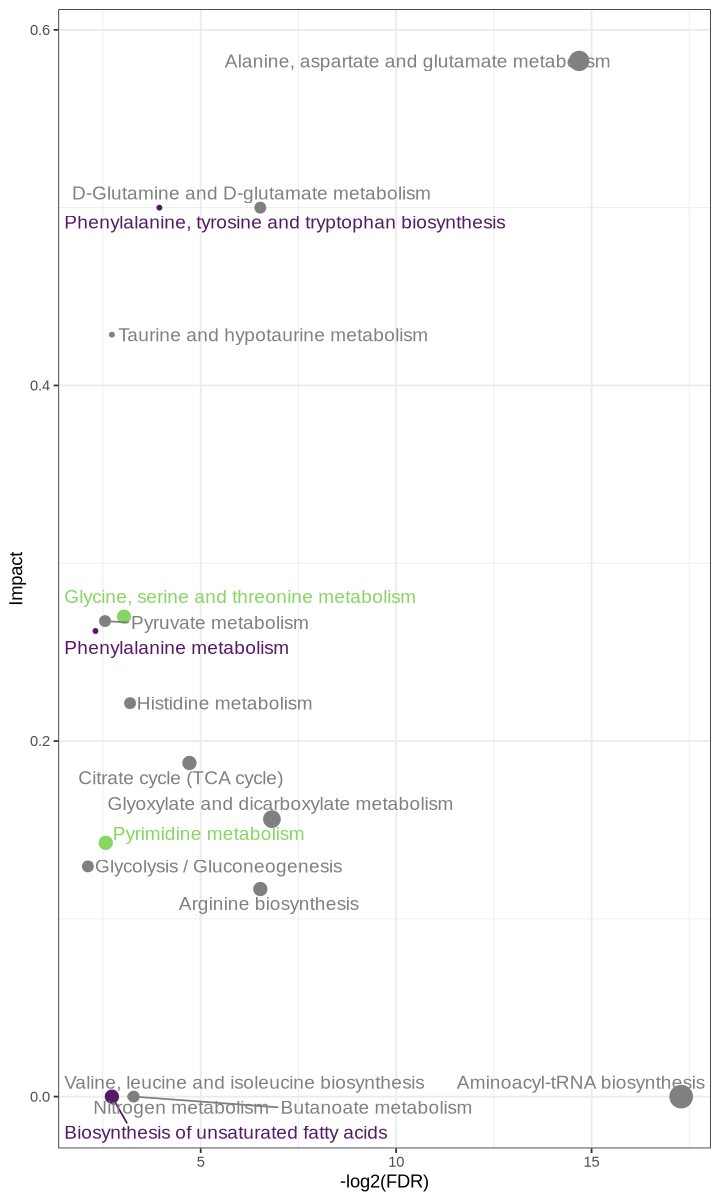

In [14]:
options(repr.plot.width = 6, repr.plot.height = 10)

g1 <- ggplot(combined_pathways_mapped, aes(x = -log2(FDR), y = Impact, fill = X, color = source, size = Hits)) + geom_point() + 
        ggrepel::geom_text_repel(aes(label = X,  color = source), size = 4, force = 2) + theme_bw() + theme(legend.position = "none") +
        scale_color_manual(values = c("#808080", "#561965", "#87d662"))

g1

## Pathview

In [10]:
metabolites_mapped <- read.csv("outputs/01_metabolites_mapped.csv")

In [11]:
psvd_cneg$feature <- gsub("\\..*","",psvd_cneg$feature)
cir_cneg$feature <- gsub("\\..*","", cir_cneg$feature)

In [13]:
indices_psvdcneg <- match(psvd_cneg$feature, metabolites_mapped$HMDB)
psvd_cneg$feature <- ifelse(is.na(indices_psvdcneg), psvd_cneg$feature, metabolites_mapped$KEGG[indices_psvdcneg])

indices_circneg <- match(cir_cneg$feature, metabolites_mapped$HMDB)
cir_cneg$feature <- ifelse(is.na(indices_circneg), cir_cneg$feature, metabolites_mapped$KEGG[indices_circneg])

indices_psvdcir <- match(psvd_cir$feature, metabolites_mapped$HMDB)
psvd_cir$feature <- ifelse(is.na(indices_psvdcir), psvd_cir$feature, metabolites_mapped$KEGG[indices_psvdcir])

In [16]:
logFC <- psvd_cneg$logFC
names(logFC) <- psvd_cneg$feature

In [17]:
pathview(cpd.data = logFC, 
         pathway.id = "hsa00250", 
         species = "hsa", 
         kegg.native = T)

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory 2022_PSVD_metabolomics/2022_PSVD_metabolomics

Info: Writing image file hsa00250.pathview.png



## Outputs

In [16]:
write.csv(psvd_cneg, "outputs/05_psvd_cneg_kegg.csv")
write.csv(cir_cneg, "outputs/05_cir_cneg_kegg.csv")

In [16]:
ggsave(file = "outputs/05_pathways.svg", plot = g1, width = 8, height = 12, dpi = 300)